In [841]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [842]:
df = pd.read_csv("winequality-red.csv", sep= ";")

# DataFrame'i yazdır
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [843]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [845]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


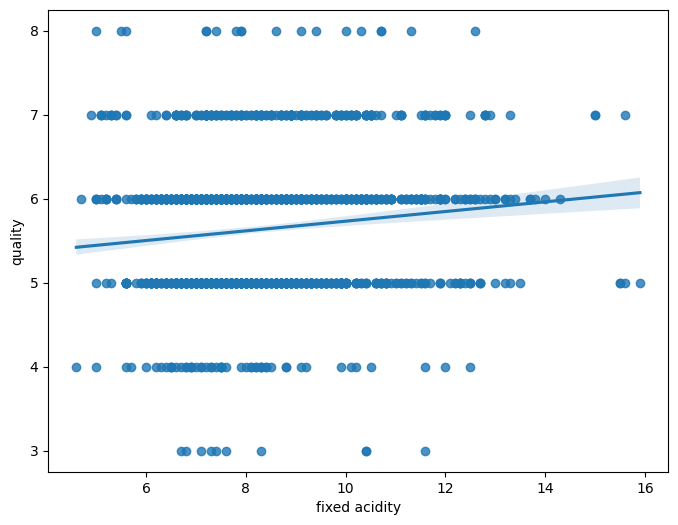

In [846]:
plt.figure(figsize=(8,6))
sns.regplot(x='fixed acidity', y='quality', data=df)
plt.show()

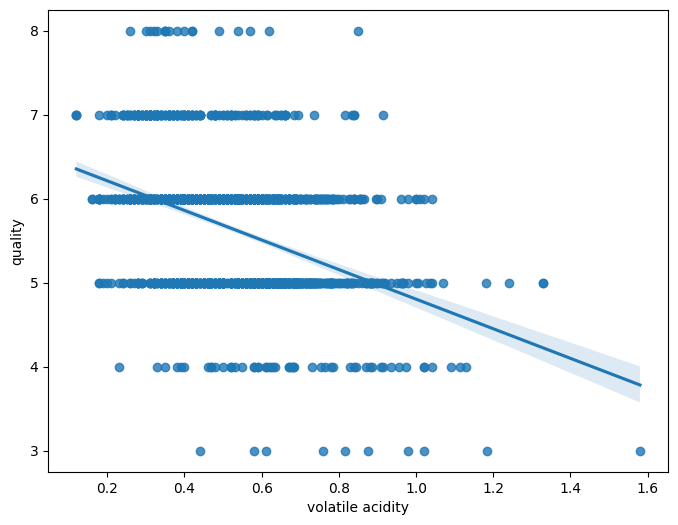

In [847]:
plt.figure(figsize=(8,6))
sns.regplot(x='volatile acidity', y='quality', data=df)
plt.show()

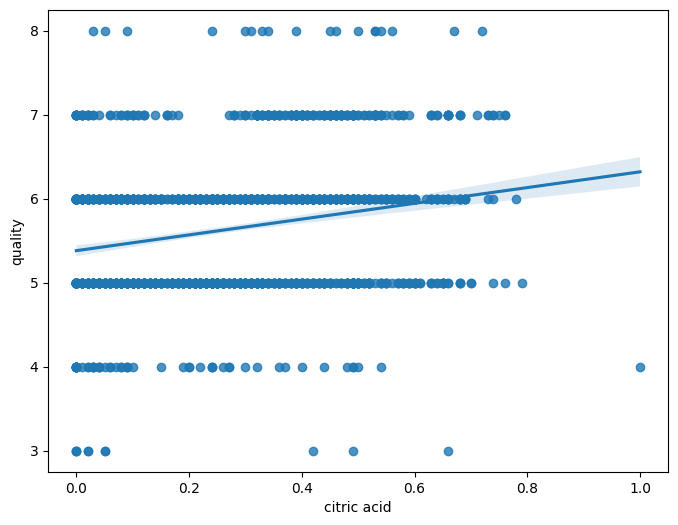

In [848]:
plt.figure(figsize=(8,6))
sns.regplot(x='citric acid', y='quality', data=df)
plt.show()

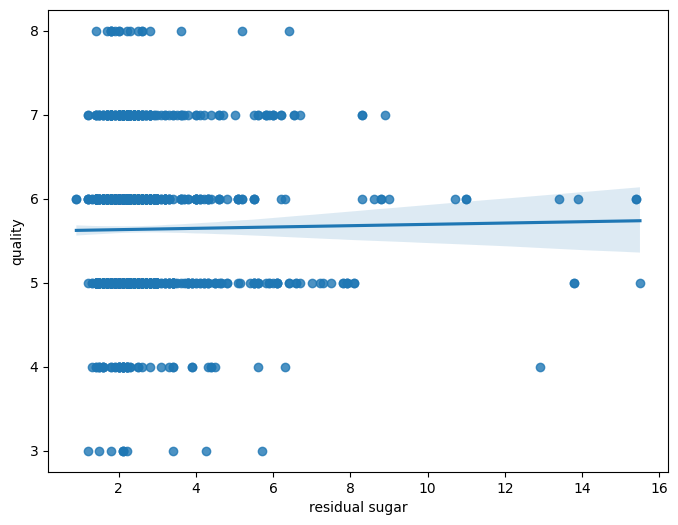

In [849]:
plt.figure(figsize=(8,6))
sns.regplot(x='residual sugar', y='quality', data=df)
plt.show()

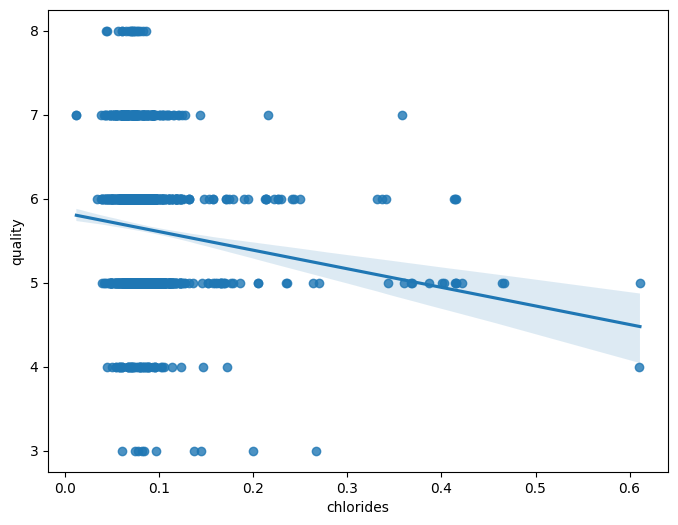

In [850]:
plt.figure(figsize=(8,6))
sns.regplot(x='chlorides', y='quality', data=df)
plt.show()

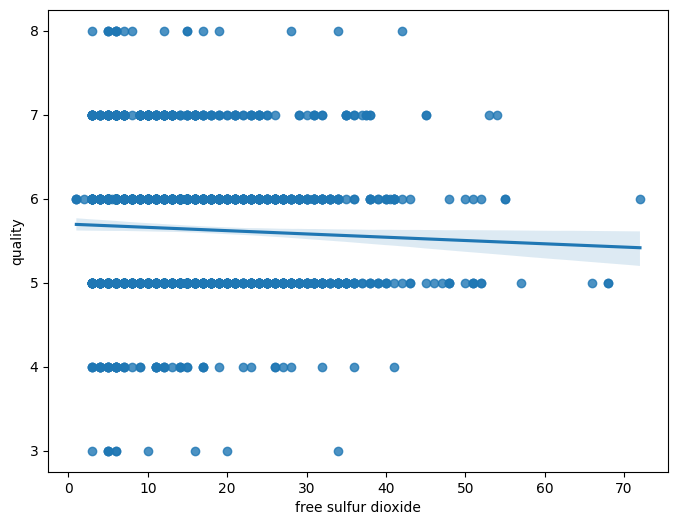

In [851]:
plt.figure(figsize=(8,6))
sns.regplot(x='free sulfur dioxide', y='quality', data=df)
plt.show()

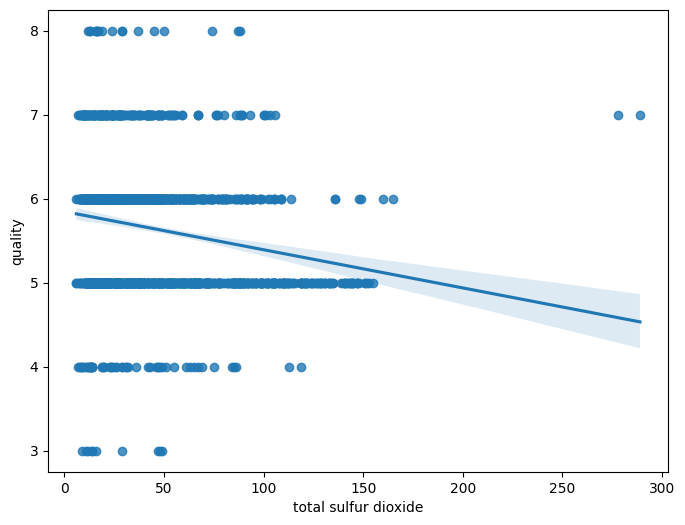

In [852]:
plt.figure(figsize=(8,6))
sns.regplot(x='total sulfur dioxide', y='quality', data=df)
plt.show()

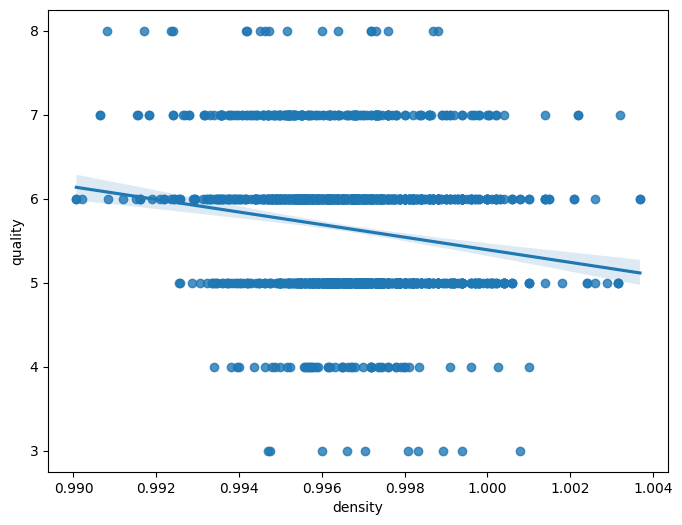

In [853]:
plt.figure(figsize=(8,6))
sns.regplot(x='density', y='quality', data=df)
plt.show()

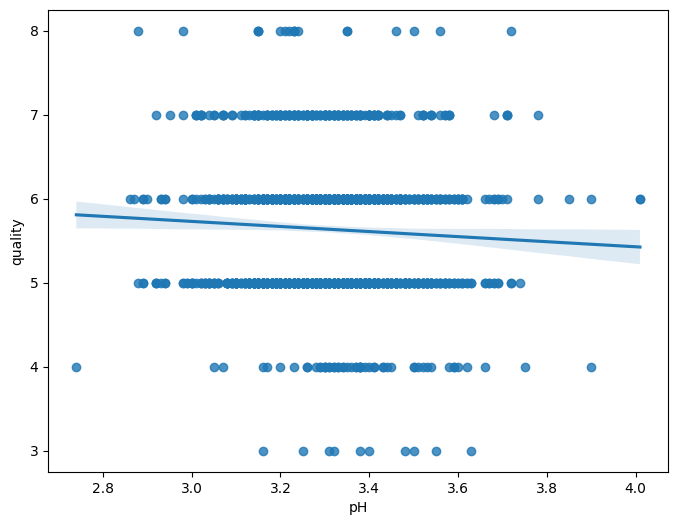

In [854]:
plt.figure(figsize=(8,6))
sns.regplot(x='pH', y='quality', data=df)
plt.show()

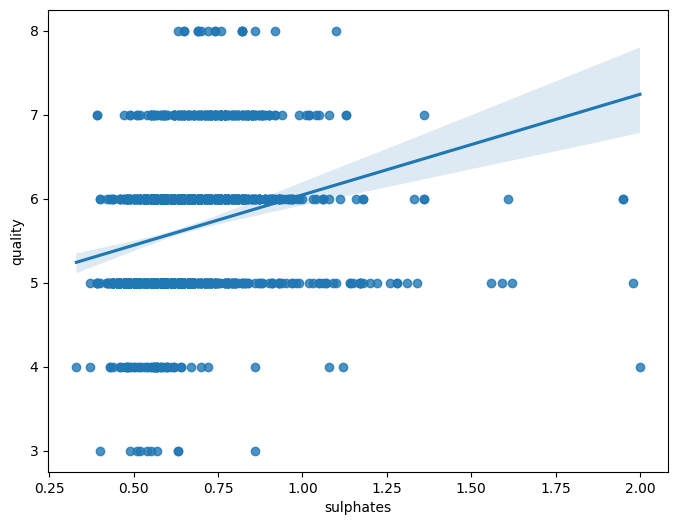

In [855]:
plt.figure(figsize=(8,6))
sns.regplot(x='sulphates', y='quality', data=df)
plt.show()

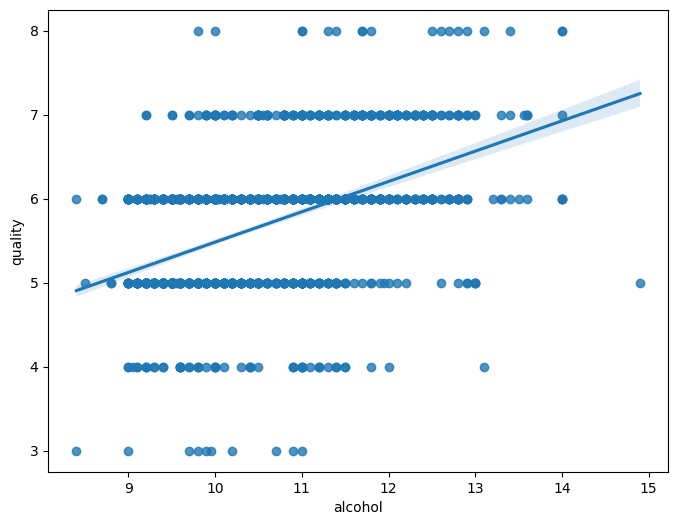

In [856]:
plt.figure(figsize=(8,6))
sns.regplot(x='alcohol', y='quality', data=df)
plt.show()

<Axes: >

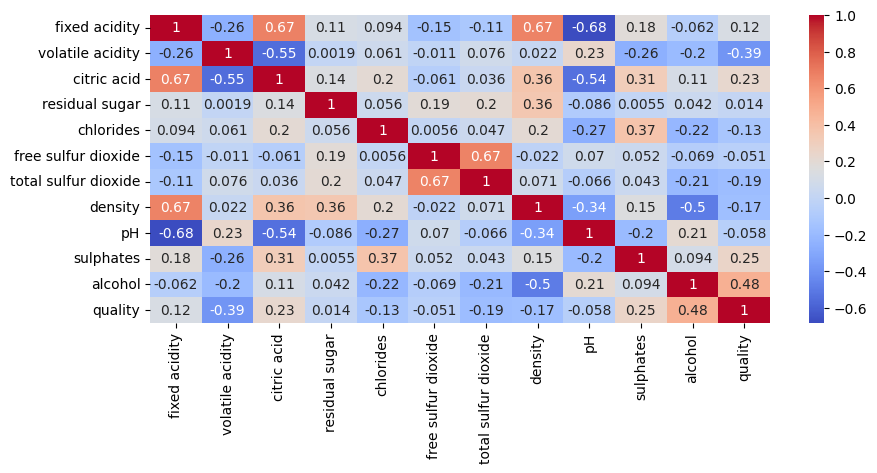

In [874]:
num_cols = df.select_dtypes (include= ["int64","float64"])

fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', ax=ax)

In [858]:
# def remove_outliers(col):
#     sorted(col)
#     Q1, Q3 = col.quantile([0.25, 0.75])

#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)

#     return lower_range, upper_range

In [859]:
# for i in df.columns:
#     lower_range, upper_range = remove_outliers(df[i])
#     df[i] = np.where(df[i] > upper_range, upper_range, df[i])
#     df[i] = np.where(df[i] < lower_range, lower_range, df[i])

In [860]:
X = df.drop('quality', axis= 1)
Y = df['quality']

In [861]:
Y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [862]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 3)

In [863]:
def logistic_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression()

    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    accaurary = accuracy_score(y_test, pred)

    return accaurary

In [864]:
def linear_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()

    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    return score

In [865]:
def decision_tree_train(x_train, x_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier

    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(x_train, y_train)

    predictions = decision_tree.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [866]:
def ridge_and_lasso_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import RidgeClassifier, Lasso

    ridge_model = RidgeClassifier(alpha=1.0)
    ridge_model.fit(x_train, y_train)

    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(x_train, y_train)

    ridge_pred = ridge_model.predict(x_test)
    lasso_pred = lasso_model.predict(x_test)

    from sklearn.metrics import accuracy_score

    ridge_accuracy = accuracy_score(y_test, ridge_pred)
    lasso_accuracy = accuracy_score(y_test, lasso_pred)

    return ridge_accuracy, lasso_accuracy

In [867]:
def random_forest_train(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    # Rastgele Orman sınıflandırma modelini eğitme
    forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    forest_model.fit(x_train, y_train)

    # Modeli test etme
    forest_pred = forest_model.predict(x_test)

    # Doğruluk oranını hesaplama
    accuracy = accuracy_score(y_test, forest_pred)
    return accuracy

In [868]:
def XGBoost_train(x_train, x_test, y_train, y_test):
    import xgboost as xgb
    from sklearn.metrics import accuracy_score

    # XGBoost sınıflandırma modelini eğitme
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100)
    xgb_model.fit(x_train, y_train)

    # Modeli test etme
    xgb_pred = xgb_model.predict(x_test)

    # Doğruluk oranını hesaplama
    accuracy = accuracy_score(y_test, xgb_pred)
    return accuracy

In [869]:
def gradient_boosting_train(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingClassifier

    # Gradient Boosting modelini eğitme
    gb_model = GradientBoostingClassifier(n_estimators=100)
    gb_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = gb_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [870]:
def KNN_train(x_train, x_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier

    # K-NN modelini eğitme
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = knn_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [871]:
def MLP_train(x_train, x_test, y_train, y_test):
    from sklearn.neural_network import MLPClassifier

    # MLP modelini eğitme
    mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
    mlp_model.fit(x_train, y_train)

    # Modeli test etme
    y_pred = mlp_model.predict(x_test)

    # Doğruluk (accuracy) hesaplama
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [872]:
logistic = logistic_train(x_train, x_test, y_train, y_test)
linear = linear_train(x_train, x_test, y_train, y_test)
decision_tree = decision_tree_train(x_train, x_test, y_train, y_test)
#ridge_and_lasso = ridge_and_lasso_train(x_train, x_test, y_train, y_test) #bunlar tahmin degil siniflandirma algoritmasi
random_forest = random_forest_train(x_train, x_test, y_train, y_test)
XGBoost = XGBoost_train(x_train, x_test, y_train, y_test)
gradient_boosting = gradient_boosting_train(x_train, x_test, y_train, y_test)
KNN = KNN_train(x_train, x_test, y_train, y_test)
MLP = MLP_train(x_train, x_test, y_train, y_test)

/home/esti002/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/esti002/miniconda3/envs/mlenv/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/esti002/miniconda3/envs/mlenv/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

In [873]:
print("logistic: ", logistic)
print("linear: ", linear)
print("decision_tree: ", decision_tree)
#print("ridge: ", str(ridge_and_lasso[0])) 
#print("lasso: ", str(ridge_and_lasso[1]))
print("random_forest: ", random_forest)
print("XGBoost: ", XGBoost)
print("gradient_boosting: ", gradient_boosting)
print("K-NN:", KNN)
print("MLP:", MLP)

logistic:  0.89375
linear:  0.2466652289868495
decision_tree:  0.915625
random_forest:  0.915625
XGBoost:  0.93125
gradient_boosting:  0.9375
K-NN: 0.8875
MLP: 0.896875
